In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv("raw_data.csv")
data.head()

,conso_elect,sexe,age,statut,nbre_occ,piece,surface,type,total_app,pourc_bill
0,Moins de 110 kWh,Homme,25 - 34 ans,Célibataire,1,7,91 - 120 m²,Appartement,6,Moins de 5%
1,Moins de 110 kWh,Homme,50 - 64 ans,Célibataire,7,3,20 - 50 m²,Studio,5,Moins de 5%
2,Moins de 110 kWh,Femme,Moins de 25 ans,Célibataire,1,2,Moins de 20 m²,Chambre,7,Moins de 5%
3,Moins de 110 kWh,Homme,25 - 34 ans,Célibataire,2,1,Moins de 20 m²,Chambre,2,Moins de 5%
4,110 - 400 kWh,Homme,25 - 34 ans,Célibataire,5,5,51 - 90 m²,Appartement,8,5 - 10%


In [ ]:
def delete_spaces(row):
   return row.rstrip()

In [ ]:
data['conso_elect'] = data['conso_elect'].apply(delete_spaces)

In [ ]:
data.to_csv('NouvelleVersion_Data.csv', index=False)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   conso_elect  749 non-null    object
 1   sexe         749 non-null    object
 2   age          749 non-null    object
 3   statut       749 non-null    object
 4   nbre_occ     749 non-null    int64 
 5   piece        749 non-null    int64 
 6   surface      749 non-null    object
 7   type         749 non-null    object
 8   total_app    749 non-null    int64 
 9   pourc_bill   749 non-null    object
dtypes: int64(3), object(7)
memory usage: 58.6+ KB


In [ ]:
data.shape

(749, 10)

In [ ]:
data.conso_elect.value_counts()

,count
conso_elect,
Moins de 110 kWh,437
110 - 400 kWh,300
401 - 800 kWh,11
800 - 2000 kWh,1


## **Analyse**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

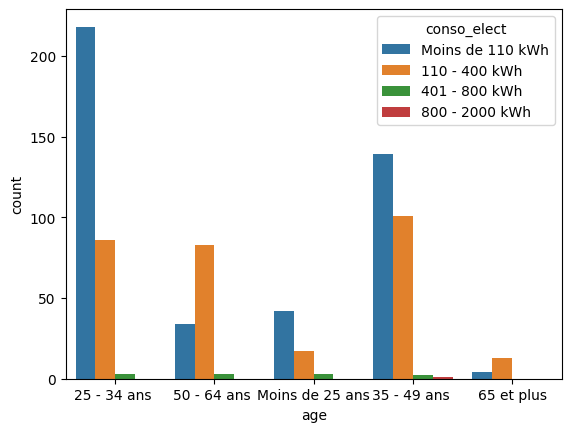

In [ ]:
sns.countplot(data=data, x='age', hue='conso_elect')
plt.show()

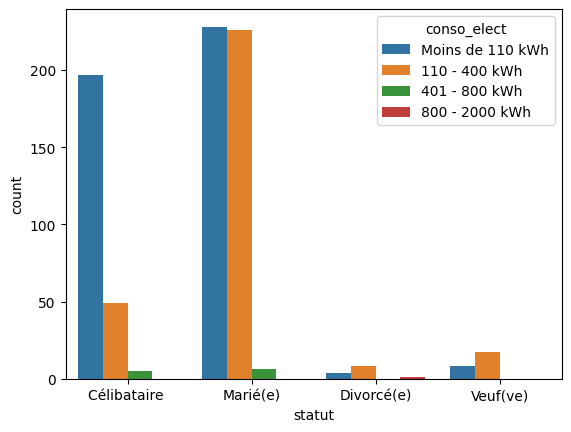

In [ ]:
sns.countplot(data=data, x="statut", hue='conso_elect')
plt.show()

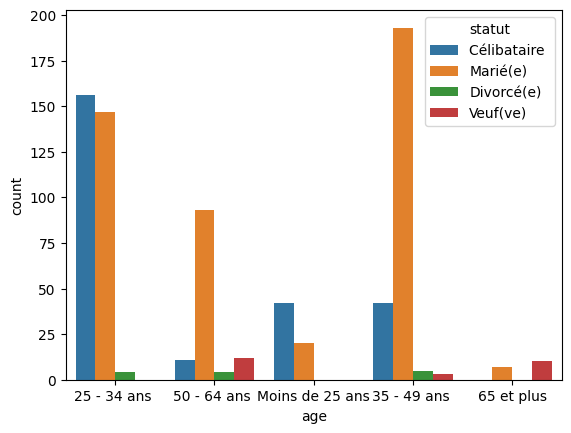

In [ ]:
sns.countplot(data=data, hue="statut", x='age')
plt.show()

### **Analyse `correlation` avec conso_elect**

Nombre d'occupants par statut marié(s)

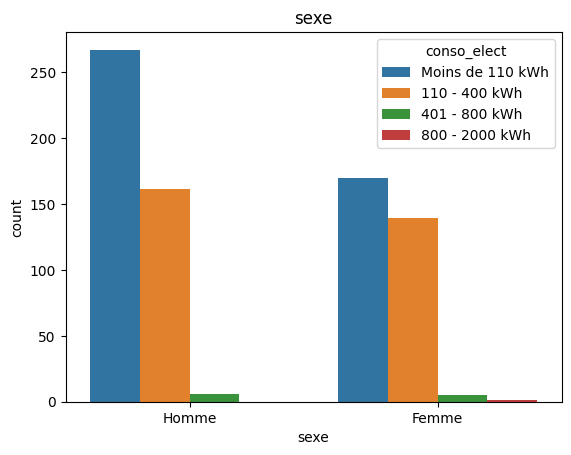

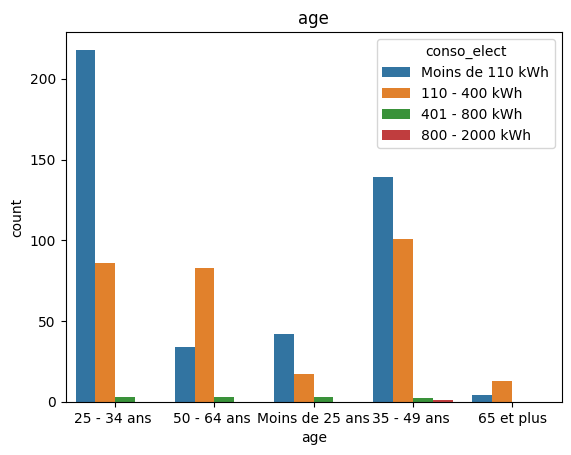

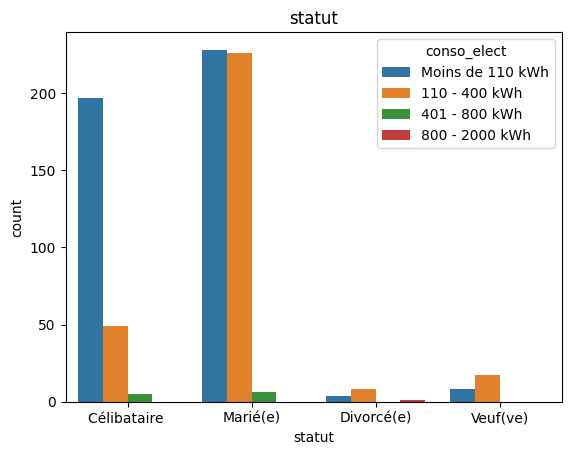

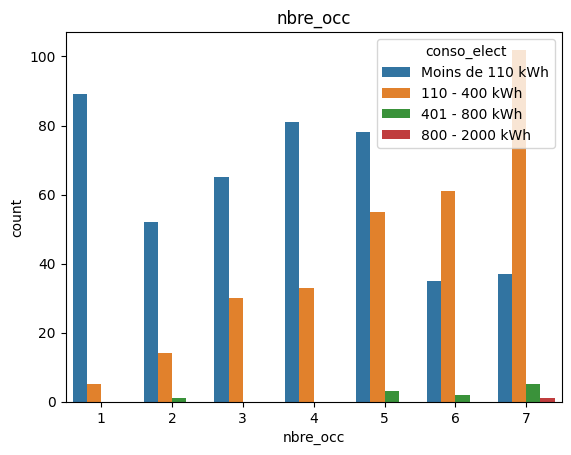

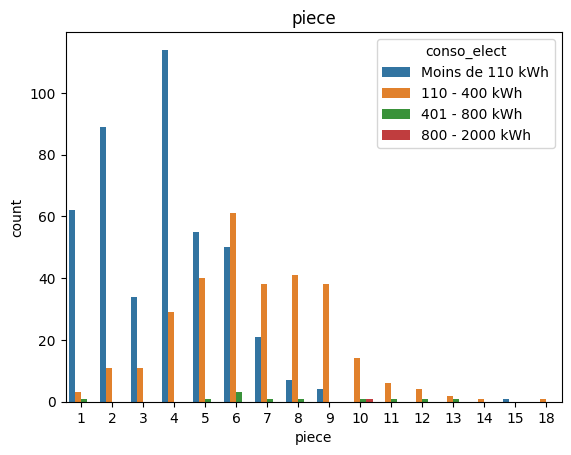

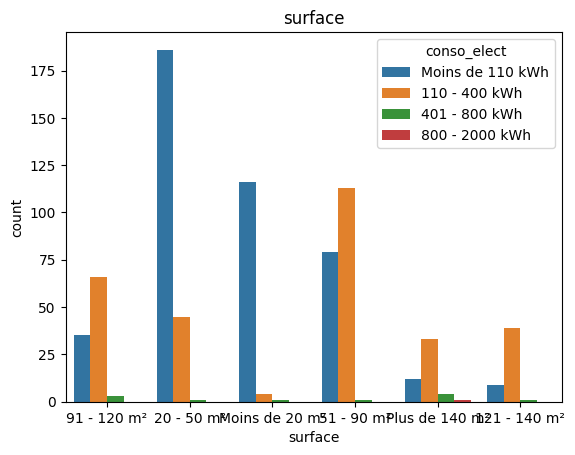

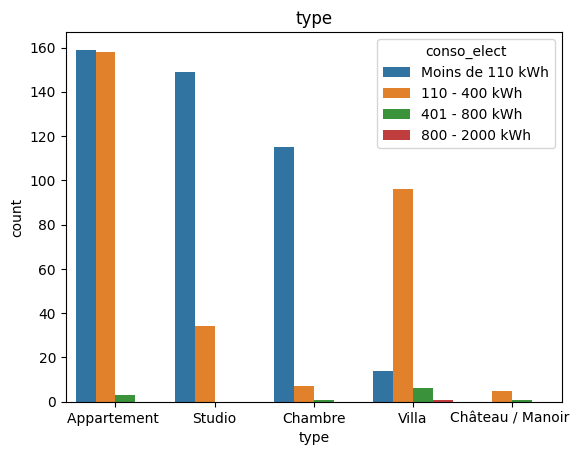

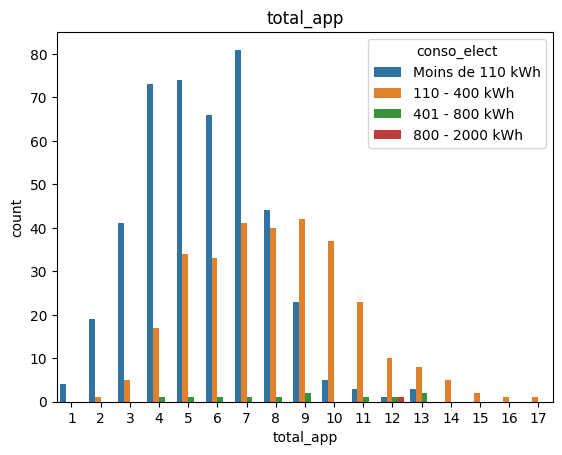

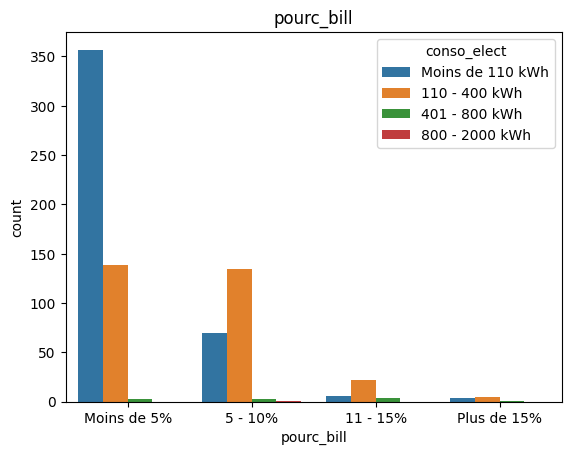

In [ ]:
features = [col for col in data.columns]

for i in features:
    if i == 'conso_elect':
        continue
    sns.countplot(data=data, x=i, hue='conso_elect')
    plt.title(f'{i}')
    plt.show()

### **Encodage**

In [ ]:
y = data['conso_elect']
X = data.drop('conso_elect', axis=1)

### **Encodage des solutions**

#### **One hot encoding**

In [ ]:
one_hot_data = pd.get_dummies(X)

In [ ]:
data.shape, one_hot_data.shape

((749, 10), (749, 29))

In [ ]:
one_hot_data *= 1

#### **Analyse de corrélation**

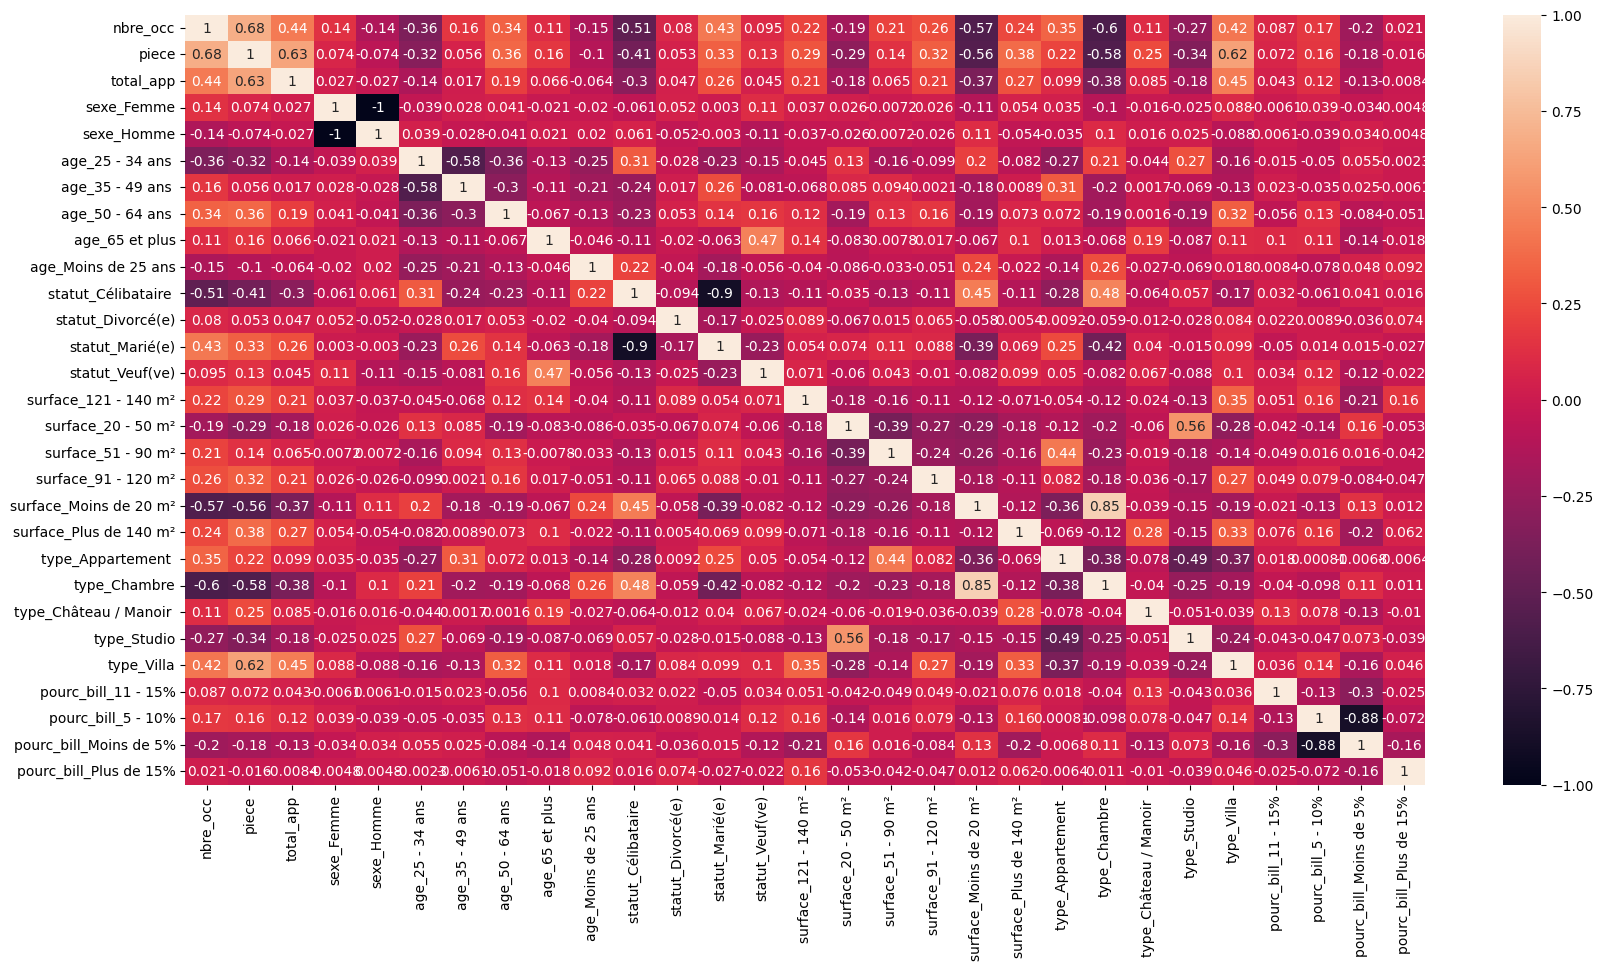

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(one_hot_data.corr(), annot=True)
plt.show()

In [ ]:
for col in one_hot_data.columns:
    for col2 in one_hot_data.columns:
            if col == col2:
                continue
            try:
              if abs(one_hot_data[col].corr(one_hot_data[col2])) >= 0.5:
                print(col, col2)
                one_hot_data.drop(col2, axis=1, inplace=True)
            except:
              print("Error occured")

nbre_occ piece
nbre_occ statut_Célibataire 
nbre_occ surface_Moins de 20 m²
nbre_occ type_Chambre
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
sexe_Femme sexe_Homme
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
age_25 - 34 ans  age_35 - 49 ans 
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error occured
Error 

In [ ]:
y.value_counts()

,count
conso_elect,
Moins de 110 kWh,437
110 - 400 kWh,300
401 - 800 kWh,11
800 - 2000 kWh,1


In [ ]:
X_hot_encoded = one_hot_data
X_hot_encoded

,nbre_occ,total_app,sexe_Femme,age_25 - 34 ans,age_50 - 64 ans,age_65 et plus,age_Moins de 25 ans,statut_Divorcé(e),statut_Marié(e),statut_Veuf(ve),...,surface_20 - 50 m²,surface_51 - 90 m²,surface_91 - 120 m²,surface_Plus de 140 m²,type_Appartement,type_Château / Manoir,type_Villa,pourc_bill_11 - 15%,pourc_bill_5 - 10%,pourc_bill_Plus de 15%
0,1,6,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,7,5,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,7,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,8,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,4,6,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
745,6,11,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
746,1,8,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
747,7,7,1,1,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0


**Projection en 9 dimensions**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_hot_encoded)

In [ ]:
pca.explained_variance_ratio_.sum()

0.963988075145343

**Hypothèse de non correlation**

**Classe par classe**

In [ ]:
len(y[y == 'Moins de 110 kWh'])

437

In [ ]:
class_one = [0] * len(y[y == 'Moins de 110 kWh'])
class_two = [1] * len(y[y == '110 - 400 kWh'])

In [ ]:
class_one_np = np.array(class_one)
class_two_np = np.array(class_two)

class_one_np.shape, class_two_np.shape

((437,), (300,))

In [ ]:
y[(y == 'Moins de 110 kWh')  | (y == '110 - 400 kWh')]

,conso_elect
0,Moins de 110 kWh
1,Moins de 110 kWh
2,Moins de 110 kWh
3,Moins de 110 kWh
4,110 - 400 kWh
...,...
744,Moins de 110 kWh
745,110 - 400 kWh
746,Moins de 110 kWh
747,110 - 400 kWh


In [ ]:
X_classes = X_pca[(y == 'Moins de 110 kWh')  | (y == '110 - 400 kWh')]
X_classes.shape

(737, 9)

In [ ]:
y_classes = np.concatenate((class_one_np, class_two_np))
y_classes.shape

(737,)

**Hypothèse de regression**

In [ ]:
np.linalg.det(X_classes.T.dot(X_classes))

3.3911934870604262e+22

In [ ]:
# Add a constant (intercept term) to the model
import statsmodels.api as sm

X_one = sm.add_constant(X_classes)


print(X)
# Fit the multinomial logistic regression model
model = sm.Logit(y_classes, X_classes)
result = model.fit()

# Print the summary of the model
print(result.summary())

      sexe              age        statut  nbre_occ  piece         surface  \
0    Homme     25 - 34 ans   Célibataire          1      7     91 - 120 m²   
1    Homme     50 - 64 ans   Célibataire          7      3      20 - 50 m²   
2    Femme  Moins de 25 ans  Célibataire          1      2  Moins de 20 m²   
3    Homme     25 - 34 ans   Célibataire          2      1  Moins de 20 m²   
4    Homme     25 - 34 ans   Célibataire          5      5      51 - 90 m²   
..     ...              ...           ...       ...    ...             ...   
744  Femme     25 - 34 ans   Célibataire          4      4     91 - 120 m²   
745  Femme     35 - 49 ans       Marié(e)         6      6     91 - 120 m²   
746  Homme     25 - 34 ans   Célibataire          1      4      20 - 50 m²   
747  Femme     25 - 34 ans       Marié(e)         7      5  Plus de 140 m²   
748  Homme     25 - 34 ans       Marié(e)         7      5     91 - 120 m²   

             type  total_app   pourc_bill  
0    Appartement   

**Documentation sur les hypothèses**


La régression logistique, bien qu'elle soit utilisée pour modéliser des variables dépendantes binaires, repose sur plusieurs hypothèses importantes pour garantir la validité des résultats obtenus. Voici les hypothèses principales :

### 1. **Relation linéaire entre les variables indépendantes et la log-odds**
   - **Hypothèse** : Il doit exister une relation linéaire entre chaque variable indépendante et le logarithme des odds (log-odds) de la variable dépendante.
   - **Explication** : Bien que la régression logistique ne suppose pas de relation linéaire entre les variables indépendantes et la variable dépendante elle-même, elle suppose que les log-odds (le logarithme de la probabilité de l'événement divisé par la probabilité de l'absence de l'événement) sont une fonction linéaire des variables indépendantes.

### 2. **Indépendance des observations**
   - **Hypothèse** : Les observations doivent être indépendantes les unes des autres.
   - **Explication** : Cette hypothèse signifie qu'il ne doit pas y avoir de corrélation entre les observations. Par exemple, dans le cas de données longitudinales ou de séries temporelles, cette hypothèse pourrait être violée, et il serait alors nécessaire d'utiliser des modèles adaptés tels que les modèles à effets mixtes.

### 3. **Absence de multicolinéarité**
   - **Hypothèse** : Les variables indépendantes ne doivent pas être fortement corrélées entre elles.
   - **Explication** : La multicolinéarité peut rendre difficile l'interprétation des coefficients des variables indépendantes car elle gonfle les erreurs standard des coefficients, ce qui rend difficile de déterminer quels facteurs sont importants.

### 4. **Taille de l'échantillon suffisante**
   - **Hypothèse** : Il est supposé que la taille de l'échantillon est suffisamment grande pour que les résultats soient fiables.
   - **Explication** : Une taille d'échantillon trop petite peut entraîner des estimations instables des coefficients et des p-values, ce qui peut fausser les conclusions. Une règle empirique est d'avoir au moins 10 à 20 événements (c'est-à-dire des observations où la variable dépendante est égale à 1) par variable indépendante.

### 5. **Exclusivité et exhaustivité des catégories**
   - **Hypothèse** : Dans le cas où les variables indépendantes sont catégoriques, les catégories doivent être mutuellement exclusives et exhaustives.
   - **Explication** : Cela signifie que chaque observation doit appartenir à une seule catégorie et qu'il ne doit pas y avoir de catégories manquantes.

### 6. **Homogénéité des variances (Homoscedasticité)**
   - **Hypothèse** : Bien que la régression logistique n'exige pas l'homoscédasticité des erreurs (comme dans la régression linéaire), il est souvent préférable que la variance des erreurs soit constante pour tous les niveaux des variables indépendantes.
   - **Explication** : Dans la pratique, cette hypothèse est moins critique pour la régression logistique, mais des violations graves peuvent affecter la qualité des résultats.

### 7. **Absence d'erreurs de spécification**
   - **Hypothèse** : Le modèle est correctement spécifié, c'est-à-dire qu'il n'y a pas de variables importantes omises et que la forme fonctionnelle est correcte.
   - **Explication** : Si des variables importantes sont omises ou si des interactions ou transformations nécessaires ne sont pas incluses, cela peut conduire à des biais dans les estimations.

### 8. **Indépendance des erreurs (Pas d'autocorrélation)**
   - **Hypothèse** : Les erreurs (résidus) doivent être indépendantes les unes des autres.
   - **Explication** : Cela est particulièrement pertinent dans les données temporelles ou spatiales où les observations peuvent être corrélées dans le temps ou dans l'espace.

### 9. **L'absence de points de levier influents**
   - **Hypothèse** : Il ne doit pas y avoir de points de données qui ont une influence excessive sur l'estimation des coefficients.
   - **Explication** : Les points de levier sont des observations qui ont des valeurs extrêmes dans les variables indépendantes et qui peuvent influencer de manière disproportionnée les résultats de la régression.
